In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio  
import plotly.express as px  
import plotly.graph_objects as go  
import plotly.figure_factory as ff  
from plotly.subplots import make_subplots  
from plotly.validators.scatter.marker import SymbolValidator

In [2]:
df = pd.read_csv('../../29CM_PJT_data/_29cm.csv', )
df = df.drop(columns = 'Unnamed: 0', axis = 1)

In [3]:
df.country.value_counts()

South Korea                 5863296
Japan                          4207
Taiwan                         1991
United States                  1806
China                          1415
Vietnam                         984
Australia                       752
Canada                          658
Singapore                       615
Germany                         578
United Kingdom                  525
Hong Kong                       378
Poland                          351
Malaysia                        326
Philippines                     305
Saudi Arabia                    226
Indonesia                       189
Thailand                        177
France                          173
Laos                            129
Russia                          118
United Arab Emirates            116
Italy                           113
Cambodia                        107
New Zealand                      95
Finland                          93
Qatar                            91
Switzerland                 

In [4]:
df.category1_name.value_counts()

의류            3566308
잡화            1478703
생활/건강          263836
가구/인테리어        211389
디지털/가전         137124
화장품/미용          74104
식품              47523
스포츠/레저          44323
컬처              32769
키즈              10967
반려동물             9637
성년의날             3438
홈_OLD             238
패션잡화_OLD           27
라이프스타일_OLD         14
뷰티_OLD              4
여성패션_OLD            3
Name: category1_name, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5880407 entries, 0 to 5880406
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   event_datatime            object 
 1   event_name                object 
 2   device_type               object 
 3   mobile_brand_name         object 
 4   mobile_model_name         object 
 5   mobile_marketing_name     object 
 6   operating_system_version  object 
 7   country                   object 
 8   region                    object 
 9   platform                  object 
 10  item_name                 object 
 11  price                     float64
 12  category1_name            object 
 13  category2_name            object 
 14  category3_name            object 
 15  brand_name                object 
 16  age                       int64  
 17  gender                    object 
 18  birth_date                object 
dtypes: float64(1), int64(1), object(17)
memory usage: 852.4+ MB


In [6]:
df.describe()

,price,age
count,5.880407e+06,5.880407e+06
mean,9.465186e+04,-1.350743e+01
std,1.169249e+05,5.654363e+02
min,0.000000e+00,-7.976000e+03
25%,3.970000e+04,2.700000e+01
50%,6.900000e+04,3.200000e+01
75%,1.190000e+05,3.900000e+01
max,1.429800e+07,1.000000e+02


In [7]:
### 이벤트에 대한 반응

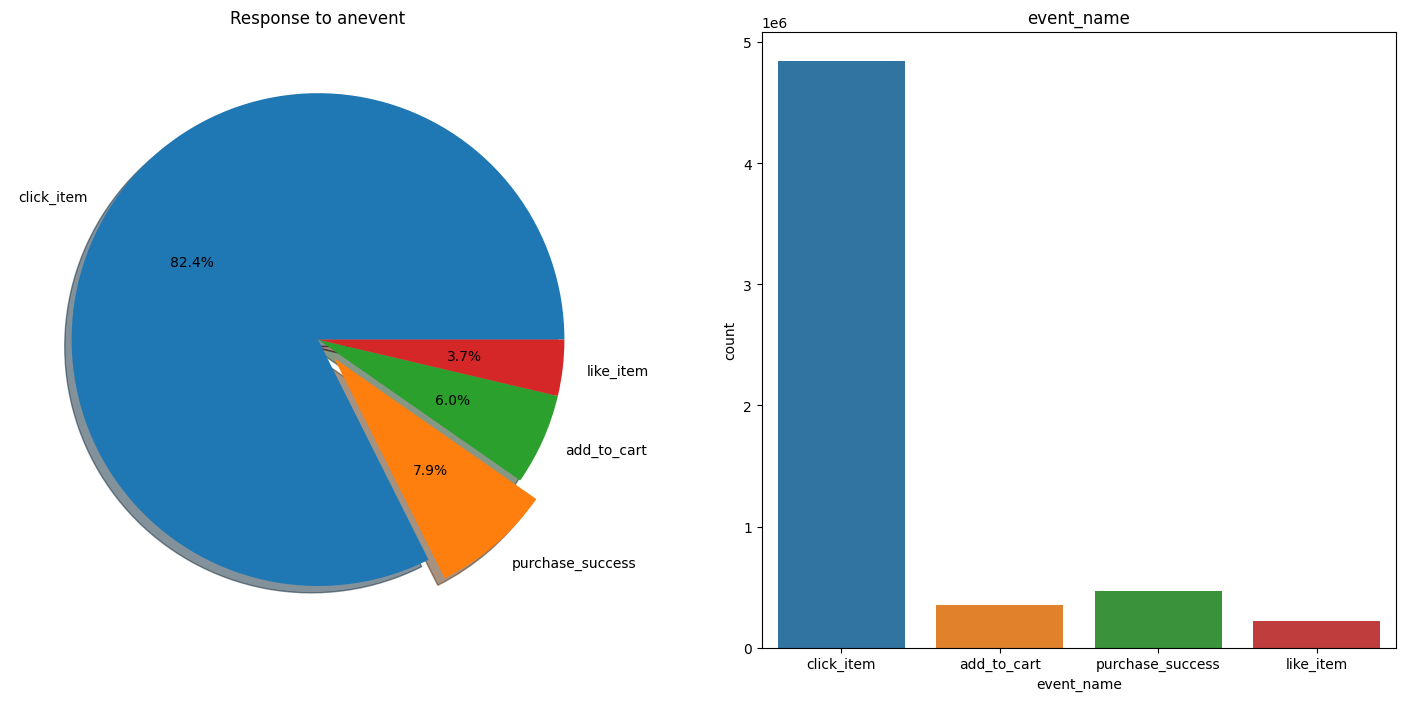

In [8]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df['event_name'].value_counts().plot.pie(explode = [0,0.1, 0, 0], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Response to anevent')
ax[0].set_ylabel('')

sns.countplot(data = df, x= 'event_name', ax = ax[1])
ax[1].set_title('event_name')
plt.show()

### 성별에 따른 이벤트 반응

In [9]:
# 성별 정보가 없는 데이터 행 삭제
df[['gender', 'event_name']].dropna(axis = 0, inplace = True)

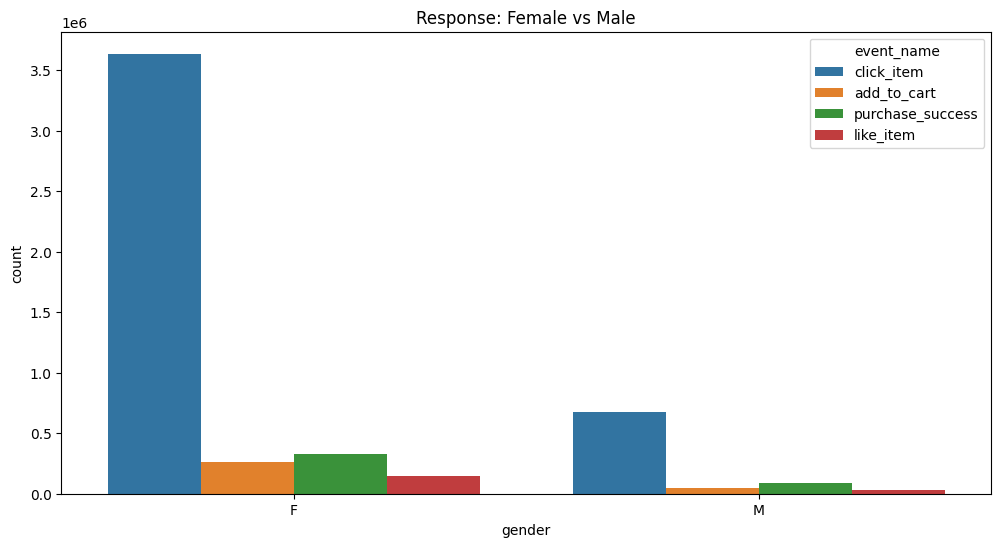

In [10]:
plt.figure(figsize = (12, 6))
ax = sns.countplot(x = 'gender', hue = 'event_name', data = df)
ax.set_title('Response: Female vs Male')
plt.show()

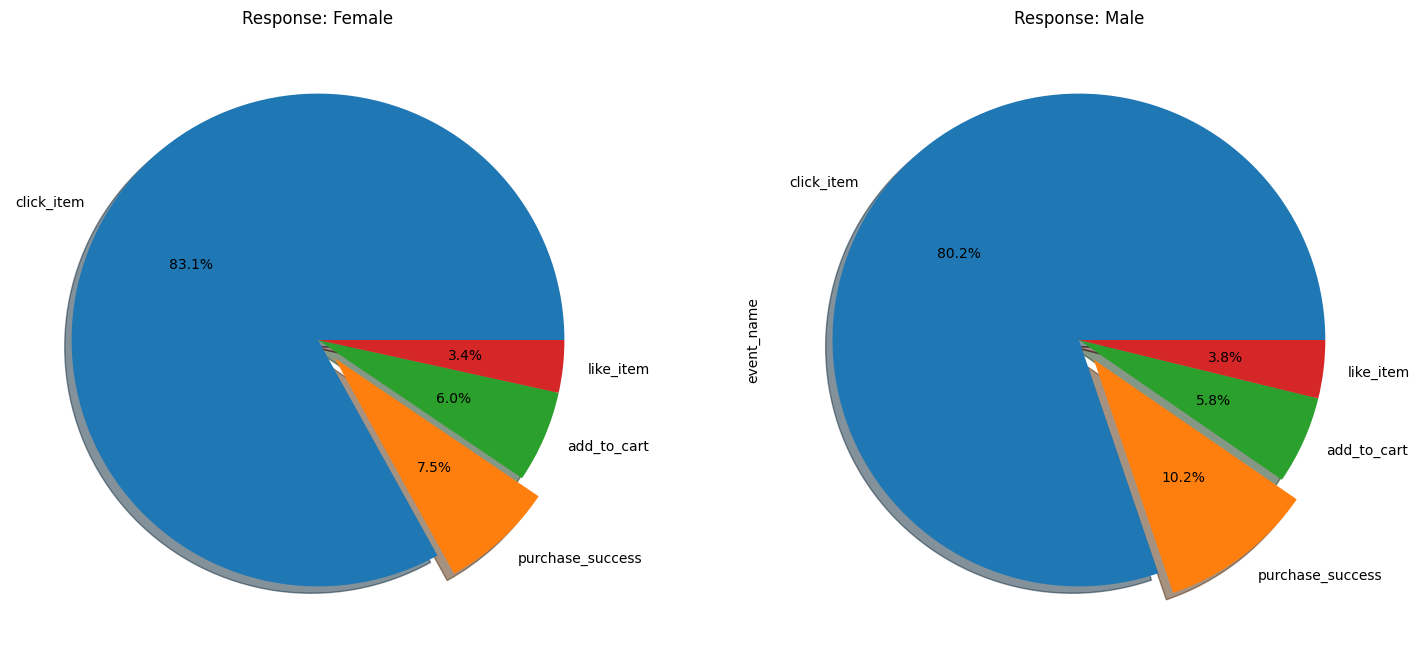

In [11]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
df.loc[(df.gender == 'F'), 'event_name'].value_counts().plot.pie(explode = [0,0.1, 0, 0], autopct='%1.1f%%', ax = ax[0], shadow=True)
ax[0].set_title('Response: Female')
ax[0].set_ylabel('')

df.loc[(df.gender == 'M'), 'event_name'].value_counts().plot.pie(explode = [0,0.1, 0, 0], autopct='%1.1f%%', ax = ax[1], shadow=True)
ax[1].set_title('Response: Male')
ax[0].set_ylabel('')

plt.show()

### 구매자와 그렇지 않은 사람들의 연령 분포

In [12]:
# 태어난 연도 이상하게 입력해서 나이 계산 안된 사람들 평균 나이로 처리
df.loc[df.age<=0, 'age'] = int(df[df.age > 0]['age'].mean())

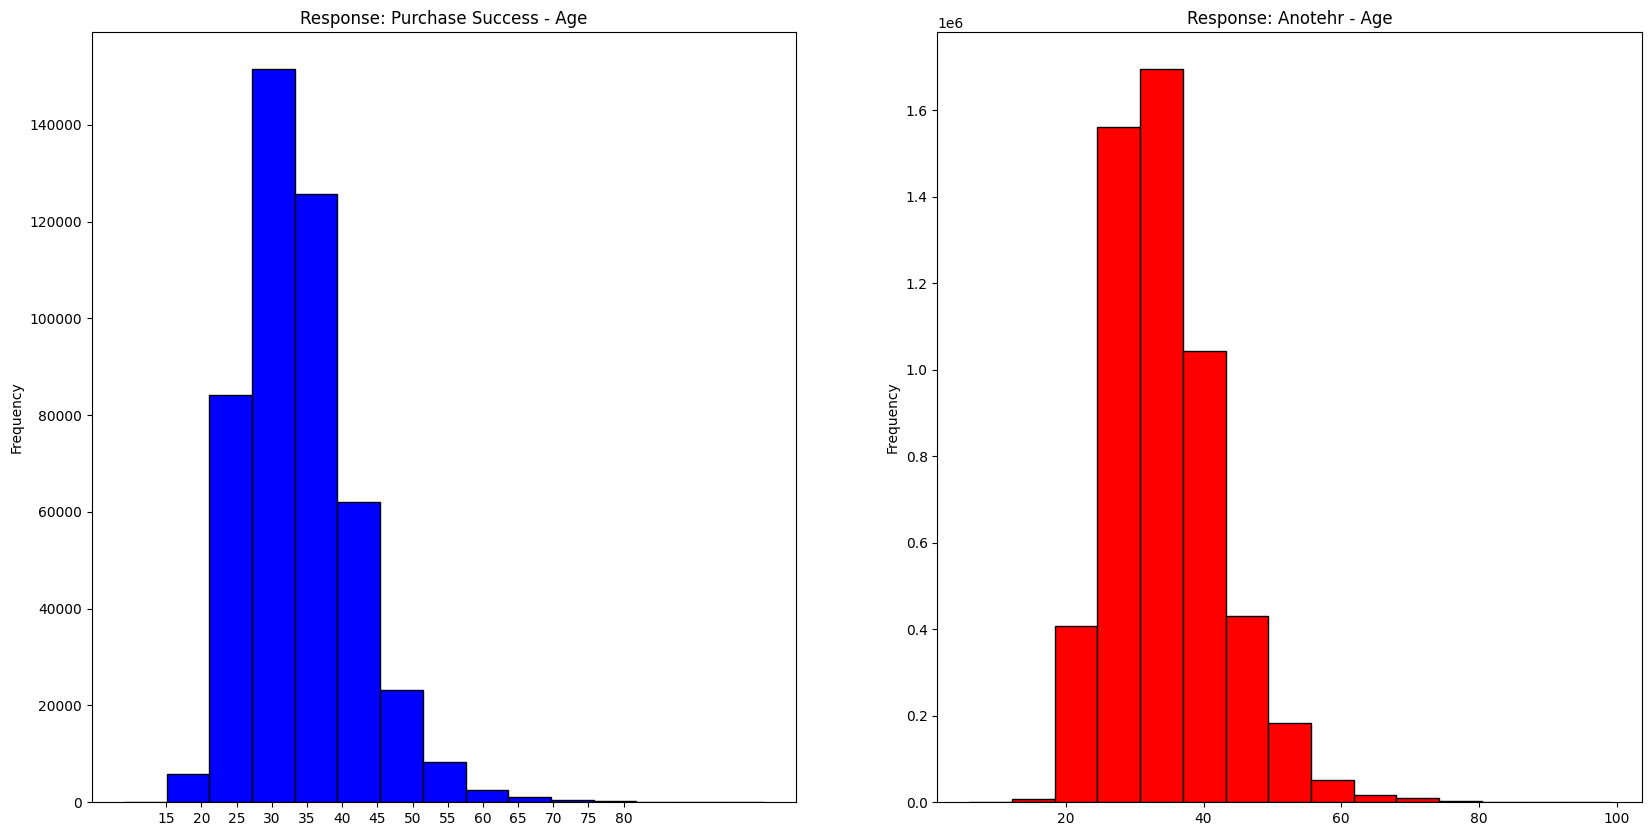

In [13]:
f, ax = plt.subplots(1, 2, figsize = (20, 10))

# 이벤트에서 물건을 구매한 사람들의 연령대를 표시
df[df['event_name'] == 'purchase_success'].age.plot.hist(ax = ax[0], bins = 15, edgecolor = 'black', color = 'blue')
ax[0].set_title('Response: Purchase Success - Age')
x1= list(range(15, 85, 5))
ax[0].set_xticks(x1);

df[~(df['event_name'] == 'purchase_success')].age.plot.hist(ax = ax[1], bins = 15, edgecolor = 'black', color = 'Red')
ax[1].set_title('Response: Anotehr - Age')
x2= list(range(15, 85, 5))
ax[0].set_xticks(x2);

plt.show()

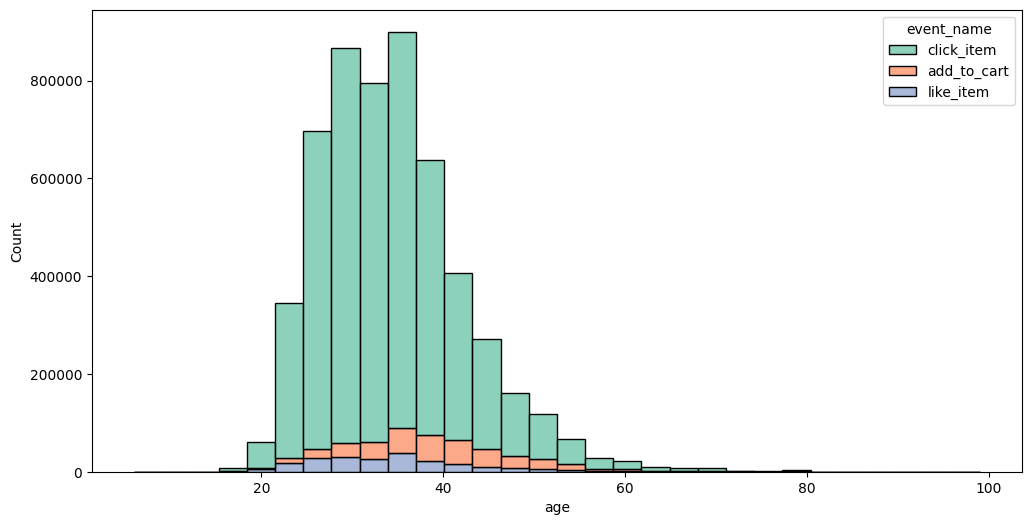

In [14]:
plt.figure(figsize = (12, 6))
sns.histplot(data = df[~(df['event_name'] == 'purchase_success')], x = 'age', bins = 30,
                        hue = 'event_name', multiple = 'stack', palette = 'Set2')
plt.show()

In [15]:
df['age_dist'] = 0

def func(x): 
    if x >= 20 and x < 30:
        return 2
    elif x >= 30 and x < 40:
        return 3
    elif x >= 40 and x < 50:
        return 4 
    elif x >= 50 and x < 60:
        return 5
    else: # 20세 미만, 60세 초과
        return 1

df.age_dist = df.age.apply(func)

In [16]:
pd.crosstab([df.age_dist], [df.gender, df.event_name], margins = True).style.background_gradient(cmap = 'summer_r')

In [17]:
df.event_datetime = pd.to_datetime(df.event_datatime, format = '%Y-%m-%d')

C:\Users\94dng\AppData\Local\Temp\ipykernel_24808\75911091.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.event_datetime = pd.to_datetime(df.event_datatime, format = '%Y-%m-%d')


In [18]:
df['month'] = 0
df['date'] = 0
df['day_of_Week'] = 0
df['month'] = pd.to_datetime(df['event_datatime'], format = '%Y-%m-%d').dt.month
df['date'] = pd.to_datetime(df['event_datatime'], format = '%Y-%m-%d').dt.day
df['day_of_Week'] = pd.to_datetime(df['event_datatime'], format = '%Y-%m-%d').dt.dayofweek

In [19]:
df['is_weekend'] = 0

In [20]:
df.loc[(df['day_of_Week'] >= 5), 'is_weekend'] = 1

In [21]:
df

,event_datatime,event_name,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,...,category3_name,brand_name,age,gender,birth_date,age_dist,month,date,day_of_Week,is_weekend
0,2021-06-03,click_item,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,Gyeonggi-do,ANDROID,...,바지,TOPTEN,54,F,1969-04-05,5,6,3,3,0
1,2021-06-03,add_to_cart,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Seoul,ANDROID,...,티셔츠,Wave union,34,F,1989-02-22,3,6,3,3,0
2,2021-06-03,click_item,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Seoul,IOS,...,니트/스웨터,MONGDOL,39,F,1984-08-22,3,6,3,3,0
3,2021-06-03,click_item,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,Gyeongsangbuk-do,IOS,...,숄더백,yeomim,51,F,1972-09-07,5,6,3,3,0
4,2021-06-03,add_to_cart,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,Seoul,ANDROID,...,레인부츠/스노우부츠,Rockfish Weatherwear,38,NaN,1985-04-04,3,6,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880402,2021-08-04,click_item,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeongsangnam-do,IOS,...,파자마,Foli,24,F,1999-07-12,2,8,4,2,0
5880403,2021-08-04,click_item,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeongsangnam-do,IOS,...,티셔츠,GUAV,25,F,1998-04-04,2,8,4,2,0
5880404,2021-08-04,click_item,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,Gyeonggi-do,IOS,...,볼캡,BALANSA (매입),32,F,1991-12-03,3,8,4,2,0
5880405,2021-08-04,click_item,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,Busan,ANDROID,...,재킷,ANDNEEDS,45,F,1978-12-21,4,8,4,2,0


### 1000개 미만의 카테고리인 행 삭제

In [22]:
li = []

li += list(df.loc[df['category1_name']=='홈_OLD'].index)
li += list(df.loc[df['category1_name']=='패션잡화_OLD'].index)
li += list(df.loc[df['category1_name']=='라이프스타일_OLD'].index)
li += list(df.loc[df['category1_name']=='뷰티_OLD'].index)
li += list(df.loc[df['category1_name']=='여성패션_OLD'].index)
len(li)

286

In [23]:
df = df.drop(li)

In [24]:
df.loc[~(df.country=='South Korea'), ['age_dist']].value_counts()

age_dist
3           8583
2           3637
4           3148
1            887
5            855
dtype: int64

In [25]:
df.columns

Index(['event_datatime', 'event_name', 'device_type', 'mobile_brand_name',
       'mobile_model_name', 'mobile_marketing_name',
       'operating_system_version', 'country', 'region', 'platform',
       'item_name', 'price', 'category1_name', 'category2_name',
       'category3_name', 'brand_name', 'age', 'gender', 'birth_date',
       'age_dist', 'month', 'date', 'day_of_Week', 'is_weekend'],
      dtype='object')

## 지역을 중심으로 분포도 조사 
1. 지역별 인구수 
2. 성별 분포
- 서울 경기가 가장 많고, 남성보다는 여성이 많다.

3. 연령 분포
- 20~40이 가장 많다.

4. 구매 여부
- 구매율은 모든 지역 비슷하다.

5. 지역별 구매 카테고리
- 티셔츠가 가장 많고 계절에 맞는 비슷한 카테고리들이 분포해 있다.

6. 지역별 평균 가격
- 평균 금액대는 모두 비슷하며 티셔츠나 바지와 같은 상대적으로 저렴한 제품군이라 그런것으로 보인다.
- 고가 제품은 남성 보다 여성이 더 많이 구매한다.

7. 카테고리에 따른 선호 브랜드

## 지역별 인구수 + 성별

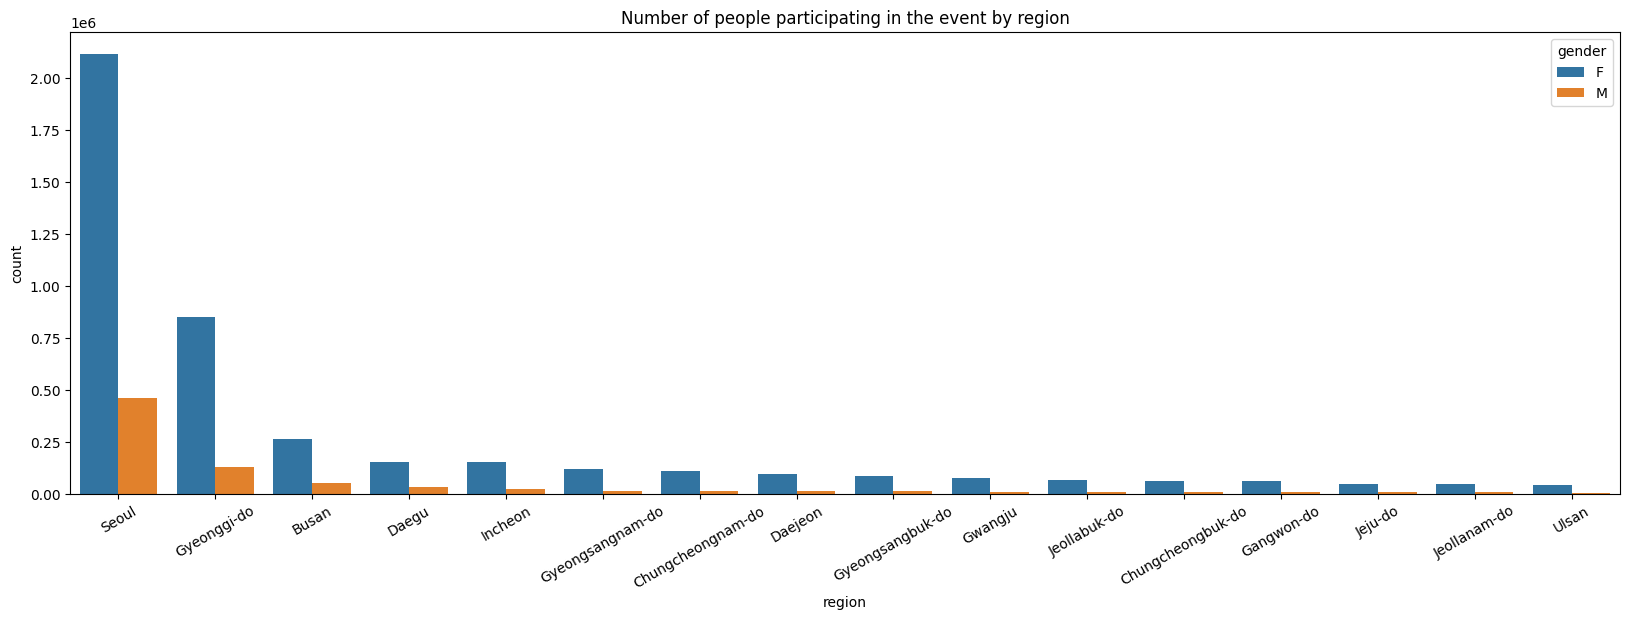

In [26]:
plt.figure(figsize = (20, 6))
ax = sns.countplot(x = 'region', data = df.loc[df['country']=='South Korea'],
                hue = 'gender',
                order = df.loc[df['country']=='South Korea', 'region'].value_counts().index)
ax.set_title('Number of people participating in the event by region')
plt.xticks(rotation = 30)
plt.show()

In [27]:
import json

with open('../../29CM_PJT_data/korea_geojson2.geojson', encoding='UTF-8') as f:
    data = json.load(f)
    
for x in data['features']:
    x['id'] = x['properties']['CTP_KOR_NM'] 
    
for idx, _ in enumerate(data['features']):
    print(data['features'][idx]['id'])

강원도
경기도
경상남도
경상북도
광주광역시
대구광역시
대전광역시
부산광역시
서울특별시
세종특별자치시
울산광역시
인천광역시
전라남도
전라북도
제주특별자치도
충청남도
충청북도


In [28]:
df.loc[df['country']=='South Korea', 'region'].unique()

array(['Gyeonggi-do', 'Seoul', 'Gyeongsangbuk-do', 'Busan', 'Ulsan',
       'Gyeongsangnam-do', 'Chungcheongbuk-do', 'Gwangju',
       'Chungcheongnam-do', 'Jeju-do', 'Jeollanam-do', 'Daejeon',
       'Jeollabuk-do', 'Daegu', 'Gangwon-do', 'Incheon', nan],
      dtype=object)

In [29]:
mapper = {'Gyeonggi-do': '경기도',
         'Seoul': '서울특별시', 
         'Gyeongsangbuk-do': '경상북도', 
         'Busan': '부산광역시', 
         'Ulsan': '울산광역시', 
         'Gyeongsangnam-do': '경상남도', 
         'Chungcheongbuk-do': '충청북도', 
         'Gwangju':'광주광역시', 
         'Chungcheongnam-do': '충청남도',
         'Jeju-do': '제주특별자치도',
         'Jeollanam-do': '전라남도',
         'Daejeon': '대전광역시',
        'Jeollabuk-do': '전라북도',
        'Daegu': '대구광역시',
        'Gangwon-do': '강원도',
        'Incheon': '인천광역시'}

In [30]:
df.loc[df['country']=='South Korea', 'region'] = df.loc[df['country']=='South Korea', 'region'].map(mapper)

In [31]:
po_kor = df.loc[df['country']=='South Korea', 'region'].value_counts()

In [32]:
po_kor = po_kor.reset_index()
po_kor

,index,region
0,서울특별시,2897648
1,경기도,1111050
2,부산광역시,357707
3,대구광역시,212617
4,인천광역시,204270
5,경상남도,154345
6,충청남도,142972
7,대전광역시,128075
8,경상북도,112005
9,광주광역시,102863


In [33]:
fig = px.choropleth_mapbox(
   po_kor, 
   geojson=data, 
   locations='index', 
   color='region',
   color_continuous_scale=px.colors.sequential.Redor,
   # featureidkey="properties.CTP_KOR_NM", # featureidkey를 사용하여 id 값을 갖는 키값 지정
   mapbox_style="carto-positron",
   zoom=5.5, 
   center = {"lat": 35.757981, "lon": 127.661132},
   opacity=0.6,
   labels={'region':'유저수'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [34]:
plt.rcParams['font.family'] = 'Malgun Gothic'

## 지역별 연령대 분포

C:\Users\94dng\AppData\Local\Temp\ipykernel_24808\109781826.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



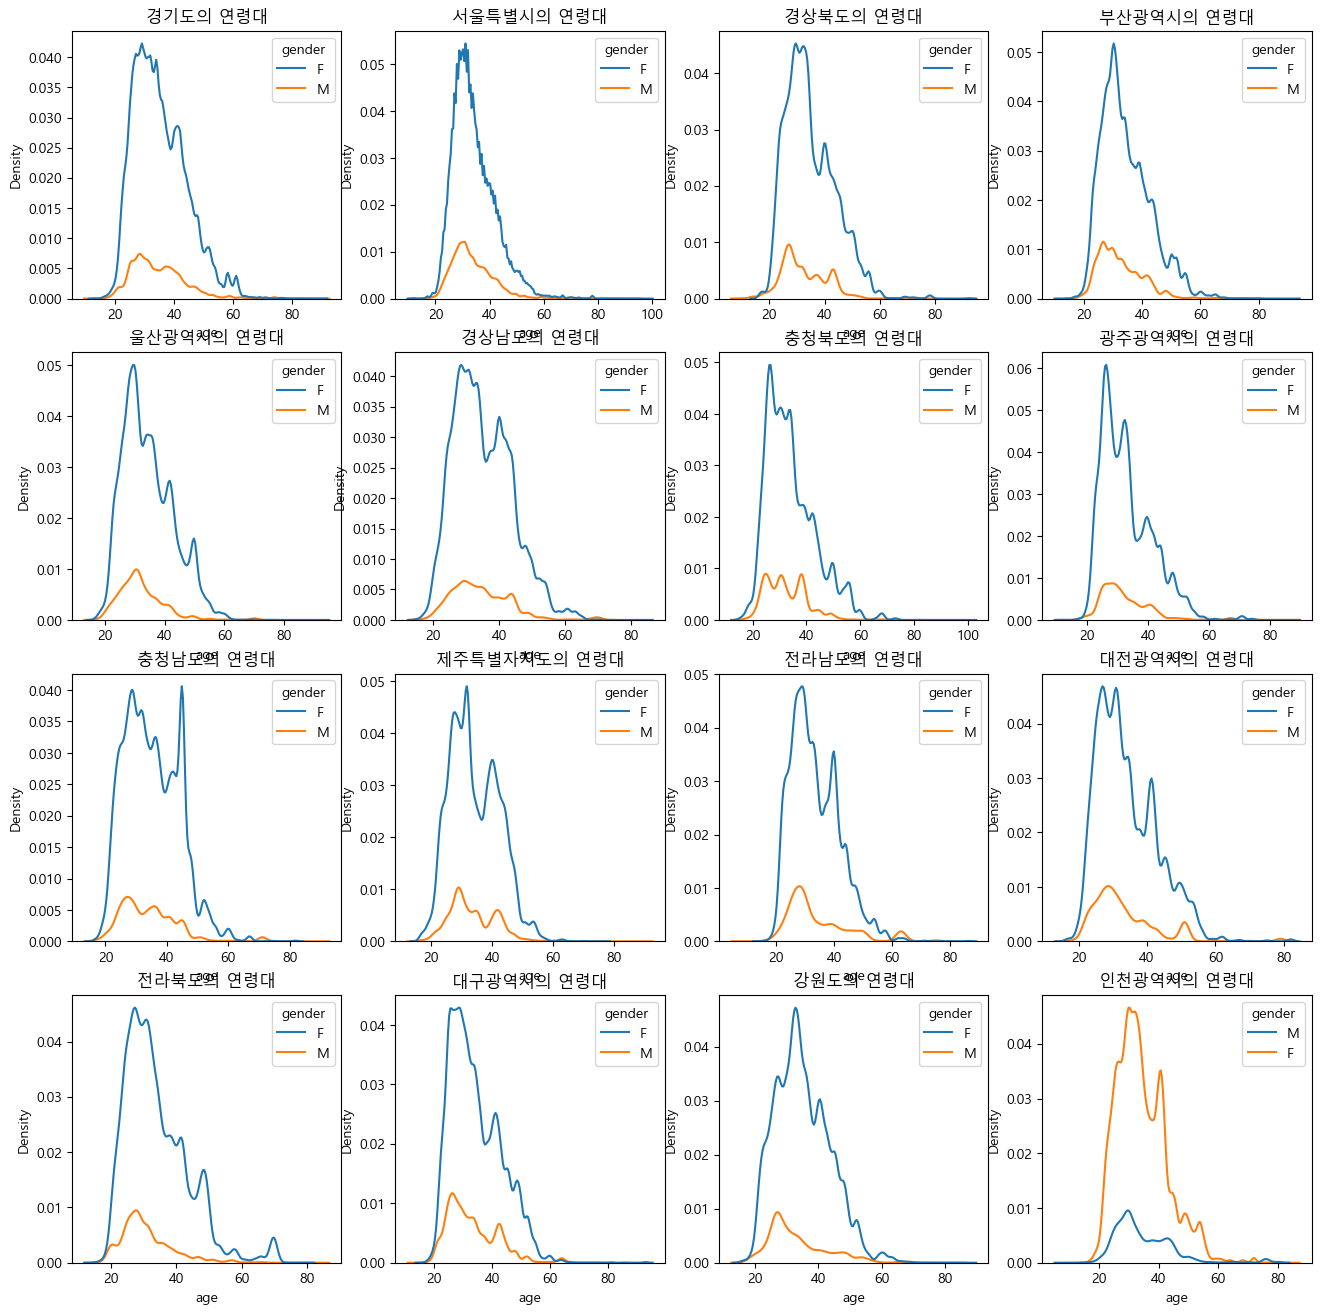

In [35]:
f, ax = plt.subplots(4, 4, figsize=(16, 16))

for idx, name in enumerate(mapper.values()):
    sns.kdeplot(data= df.loc[df['region'] == name], x='age', hue='gender', ax=ax[idx//4, idx%4])
    ax[idx//4, idx%4].set_title(f'{name}의 연령대')
f.show()

C:\Users\94dng\AppData\Local\Temp\ipykernel_24808\2238689666.py:7: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



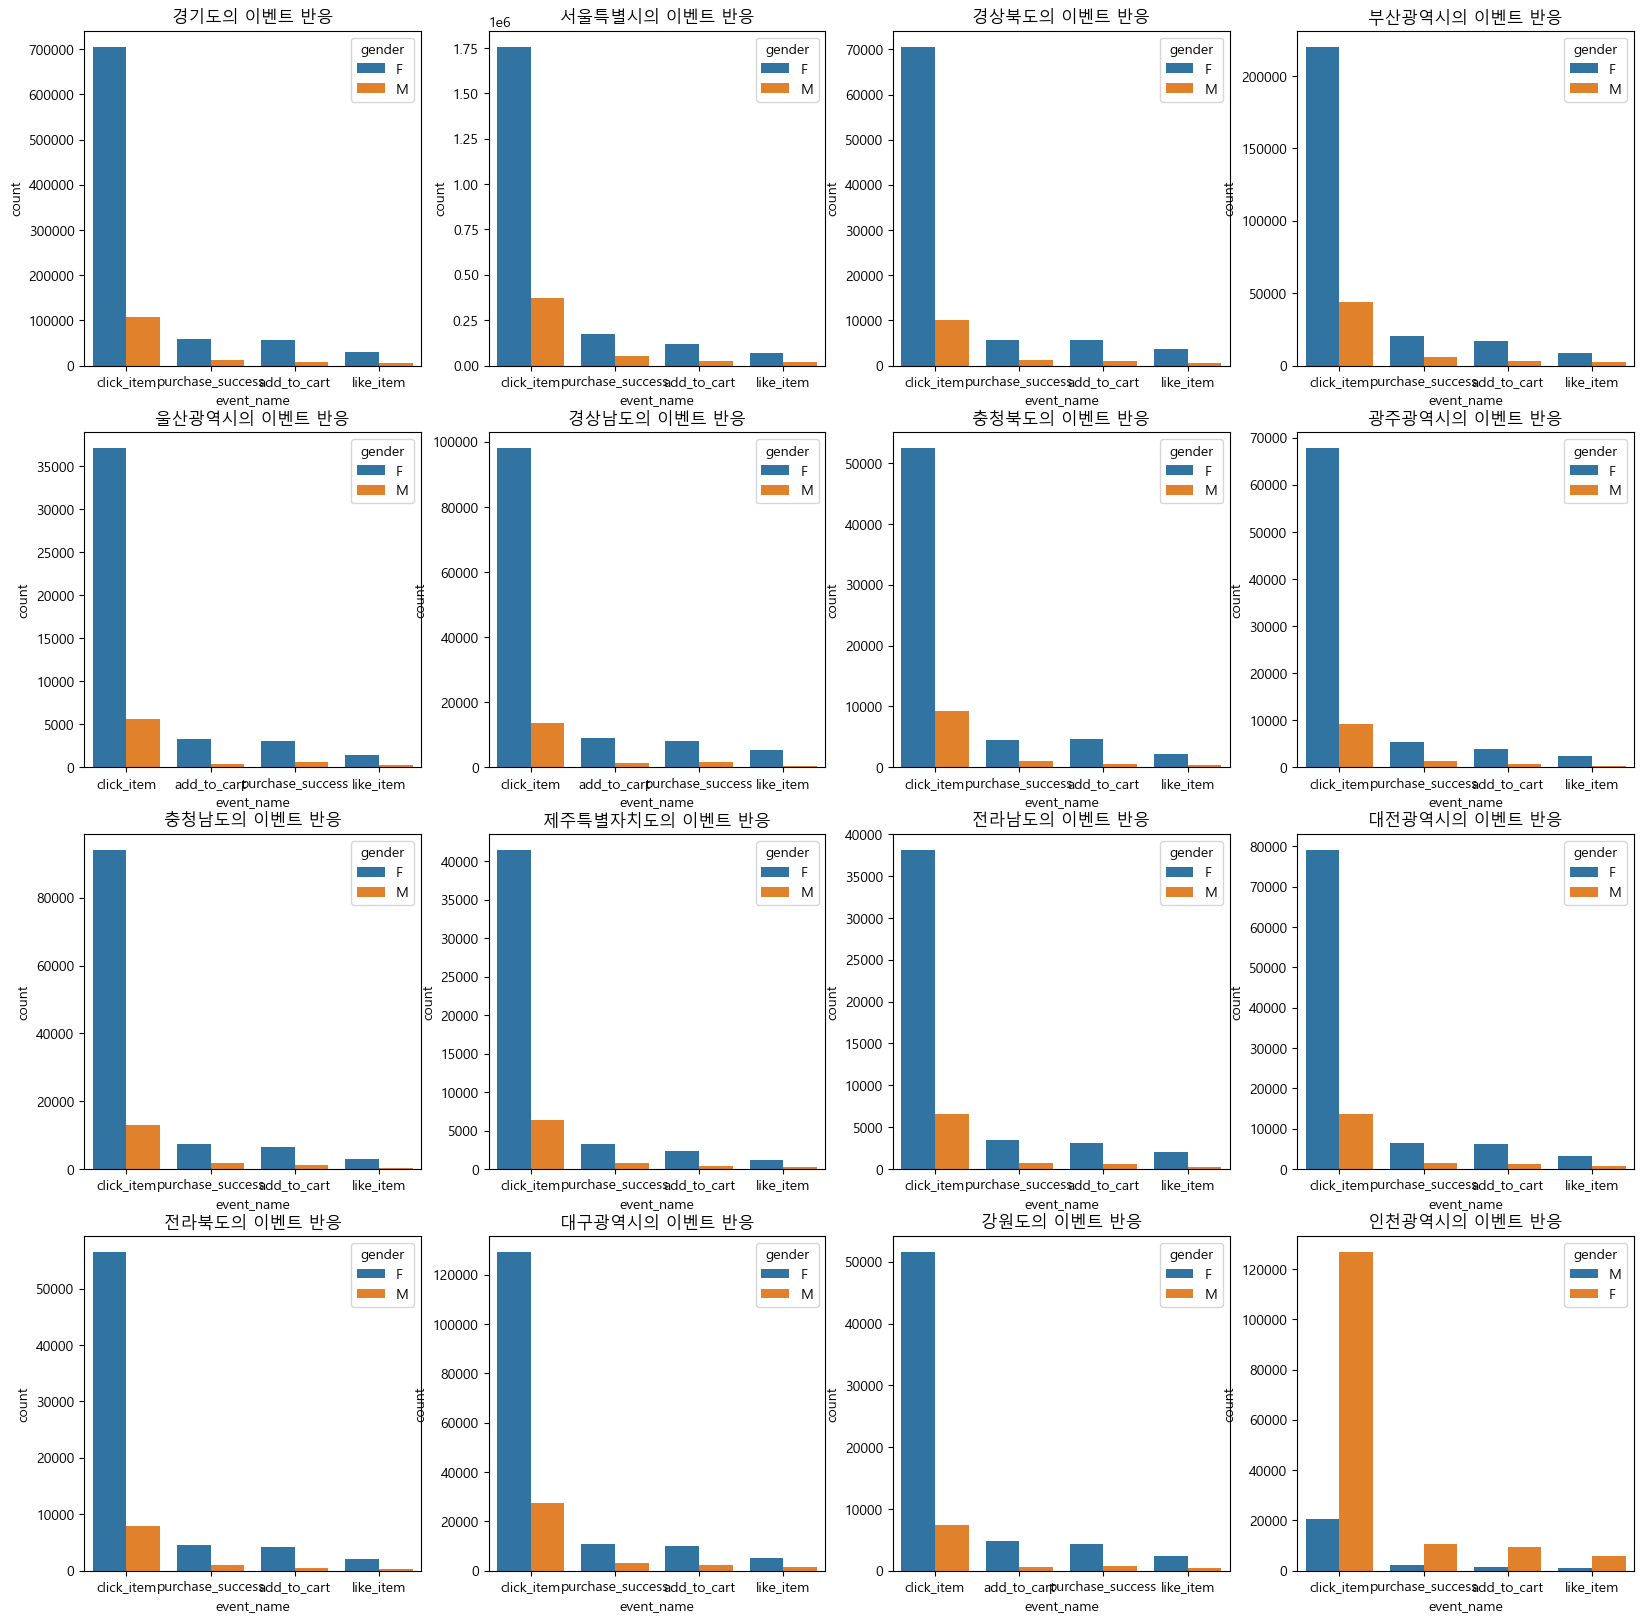

In [36]:
f, ax = plt.subplots(4, 4, figsize=(20, 20))

for idx, name in enumerate(mapper.values()):
    sns.countplot(data= df.loc[df['region'] == name], x='event_name', hue='gender', 
                order=df.loc[df['region'] == name].event_name.value_counts().index, ax=ax[idx//4, idx%4])
    ax[idx//4, idx%4].set_title(f'{name}의 이벤트 반응')
f.show()

In [37]:
df['response_rating'] = 0

In [38]:
# 규매율이 높은 지역 확인, 
# click,_item = 1
# add_cart & like_item = 5
# purchase_success = 10
def func(x): 
    if x=='click_item':
        return 1
    elif x in ['add_to_cart', 'like_item']:
        return 5
    elif x=='purchase_success':
        return 10
df.loc[df['country']=='South Korea', 'response_rating'] = df.loc[df['country']=='South Korea', 'event_name'].apply(func)

In [39]:
df.loc[df['country']=='South Korea', ['response_rating', 'region']]

,response_rating,region
0,1,경기도
1,5,서울특별시
2,1,서울특별시
3,1,경상북도
4,5,서울특별시
...,...,...
5880402,1,경상남도
5880403,1,경상남도
5880404,1,경기도
5880405,1,부산광역시


In [40]:
mean_df = df.loc[df['country']=='South Korea'].groupby(['region']).mean().reset_index()
mean_df

,region,price,age,age_dist,month,date,day_of_Week,is_weekend,response_rating
0,강원도,92622.705630,34.734916,2.994208,6.643882,15.313375,3.111390,0.325153,2.106073
1,경기도,94000.347592,34.951075,2.991429,6.628591,15.315919,3.136729,0.331315,2.048689
2,경상남도,92641.362895,34.771486,2.998588,6.645003,15.219048,3.089909,0.319771,2.110538
3,경상북도,91177.393679,34.484657,2.974537,6.627588,15.312799,3.061158,0.312584,2.091791
4,광주광역시,94377.807326,32.768955,2.802504,6.633425,15.116028,3.069325,0.310899,1.991367
5,대구광역시,94062.293377,34.005428,2.920486,6.607172,15.215326,3.066472,0.310634,2.080596
6,대전광역시,92460.259590,33.808394,2.912934,6.622323,15.536436,3.120484,0.323560,2.068983
7,부산광역시,94012.642898,34.004087,2.922820,6.632666,15.138412,3.064765,0.311694,2.114974
8,서울특별시,95660.793328,33.988072,2.912896,6.612009,15.208483,3.013209,0.298355,2.135099
9,울산광역시,92067.946910,34.308467,2.977300,6.627915,15.116993,3.120452,0.324653,2.080827


In [41]:
fig = px.choropleth_mapbox(
   mean_df, 
   geojson=data, 
   locations='region', 
   color='response_rating',
   color_continuous_scale=px.colors.sequential.Redor,
   # featureidkey="properties.CTP_KOR_NM", # featureidkey를 사용하여 id 값을 갖는 키값 지정
   mapbox_style="carto-positron",
   zoom=5.5, 
   center = {"lat": 35.757981, "lon": 127.661132},
   opacity=0.6,
   labels={'response_rating':'구매율(min: 1, max: 3)'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [42]:
mean_df2 = df.loc[((df['country']=='South Korea')&(df['event_name']=='purchase_success'))].groupby(['region']).mean().reset_index()
mean_df2

,region,price,age,age_dist,month,date,day_of_Week,is_weekend,response_rating
0,강원도,56283.118261,34.137429,2.942324,6.653260,14.499059,2.975697,0.291460,10.0
1,경기도,58694.982681,34.584259,2.977572,6.631287,14.847023,2.997891,0.298445,10.0
2,경상남도,57614.233745,34.521827,2.938018,6.632345,14.864155,2.939952,0.283201,10.0
3,경상북도,58267.820266,33.766846,2.896746,6.638611,14.590571,3.001025,0.304509,10.0
4,광주광역시,60918.770836,32.483670,2.774902,6.616886,15.000813,2.885350,0.271446,10.0
5,대구광역시,57394.274809,33.814741,2.903137,6.610174,14.766823,2.979601,0.279684,10.0
6,대전광역시,57493.514981,33.713483,2.875964,6.629654,14.870566,2.936440,0.284534,10.0
7,부산광역시,59651.202025,33.757782,2.896354,6.636245,14.666895,2.891154,0.274270,10.0
8,서울특별시,61131.234866,33.844053,2.902826,6.607721,14.862750,2.836127,0.255157,10.0
9,울산광역시,58461.662380,34.278700,2.972644,6.634557,14.670563,2.916063,0.285247,10.0


In [43]:
fig = px.choropleth_mapbox(
   mean_df2, 
   geojson=data, 
   locations='region', 
   color='price',
   color_continuous_scale=px.colors.sequential.Redor,
   # featureidkey="properties.CTP_KOR_NM", # featureidkey를 사용하여 id 값을 갖는 키값 지정
   mapbox_style="carto-positron",
   zoom=5.5, 
   center = {"lat": 35.757981, "lon": 127.661132},
   opacity=0.6,
   labels={'price':'평균 가격대'}
)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

C:\Users\94dng\AppData\Local\Temp\ipykernel_24808\860504556.py:8: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



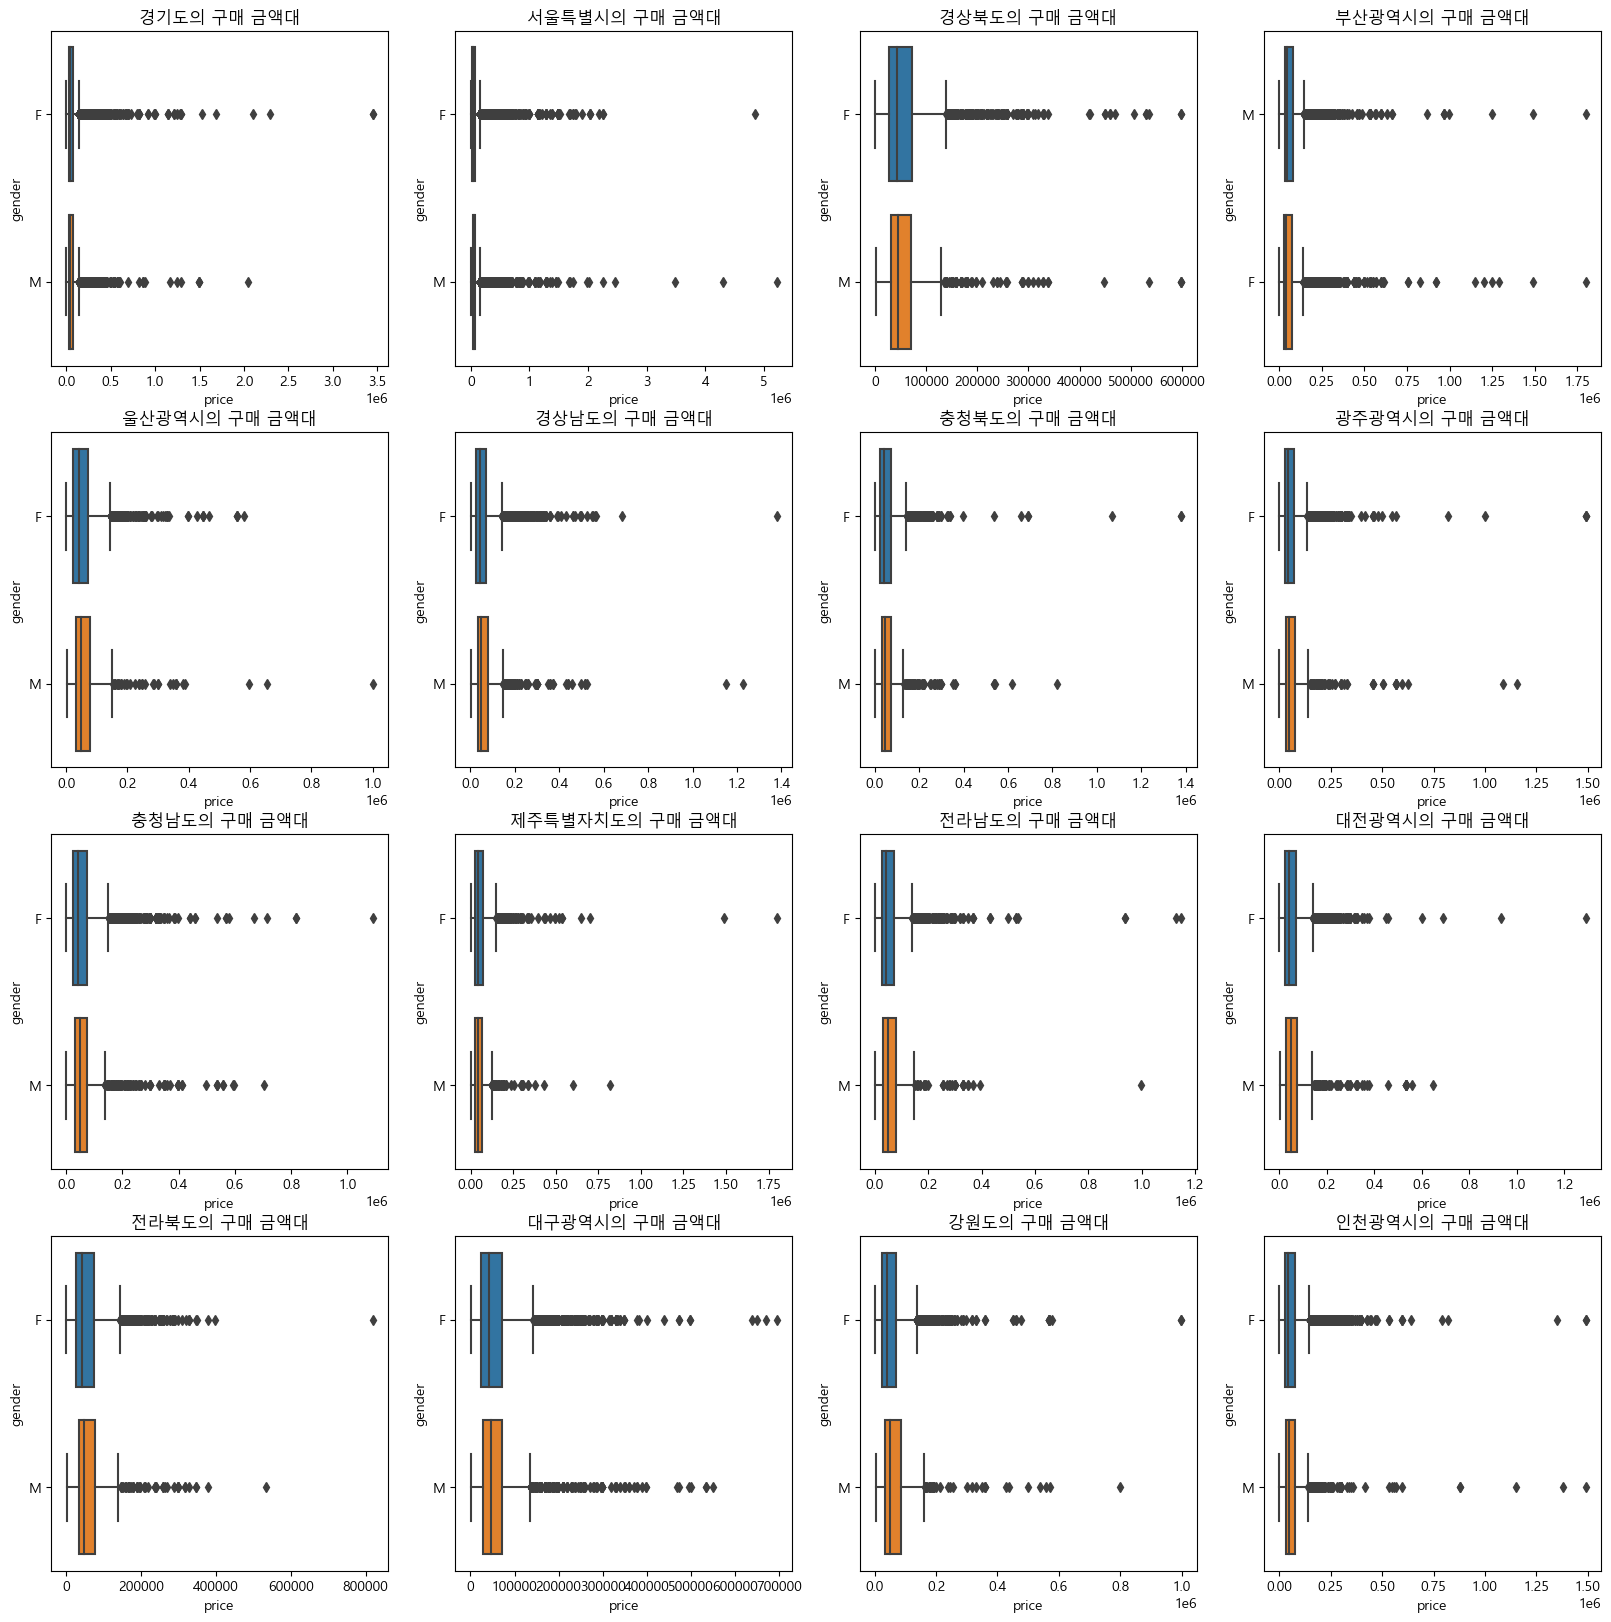

In [44]:
f, ax = plt.subplots(4, 4, figsize=(20, 20))

for idx, name in enumerate(mapper.values()):
    sns.boxplot(x = 'price', y = 'gender', data = df.loc[((df['region']==name)&(df['event_name']=='purchase_success'))], ax = ax[idx//4, idx%4])
    ax[idx//4, idx%4].set_title(f'{name}의 구매 금액대')
    # ax[idx//4, idx%4].set_yticks(range(0, 110, 10))
    # ax[idx//4, idx%4].set_title(f'{name}의 이벤트 반응')
f.show()



C:\Users\94dng\AppData\Local\Temp\ipykernel_24808\3437724511.py:6: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



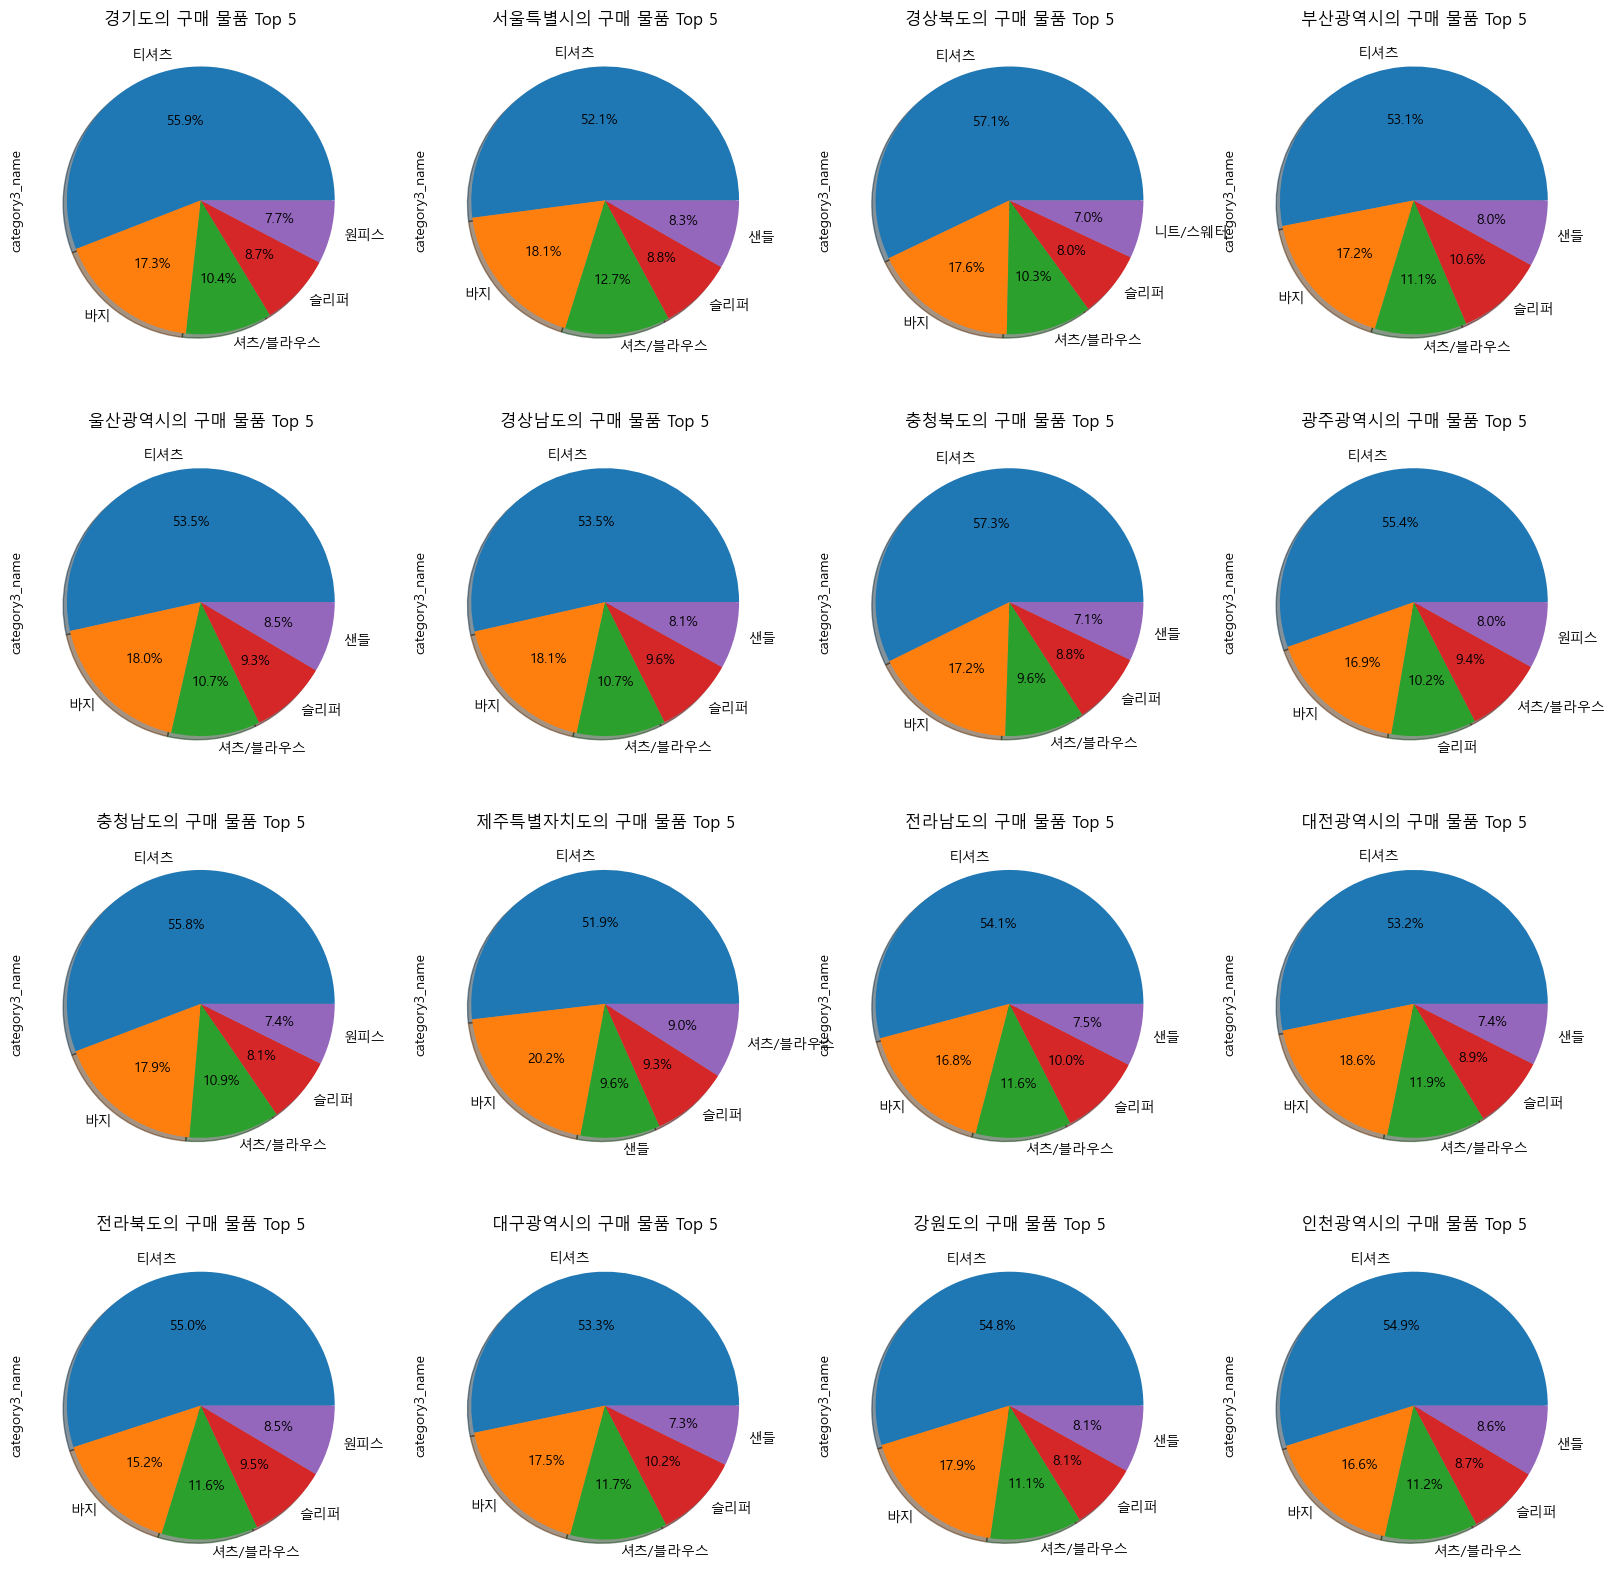

In [45]:
f, ax = plt.subplots(4, 4, figsize=(20, 20))

for idx, name in enumerate(mapper.values()):
    df.loc[((df['region'] == name)&(df['event_name']=='purchase_success')), 'category3_name'].value_counts()[:5].plot.pie(explode = [0,0, 0, 0, 0], autopct='%1.1f%%', ax = ax[idx//4, idx%4], shadow=True)
    ax[idx//4, idx%4].set_title(f'{name}의 구매 물품 Top 5')
f.show()

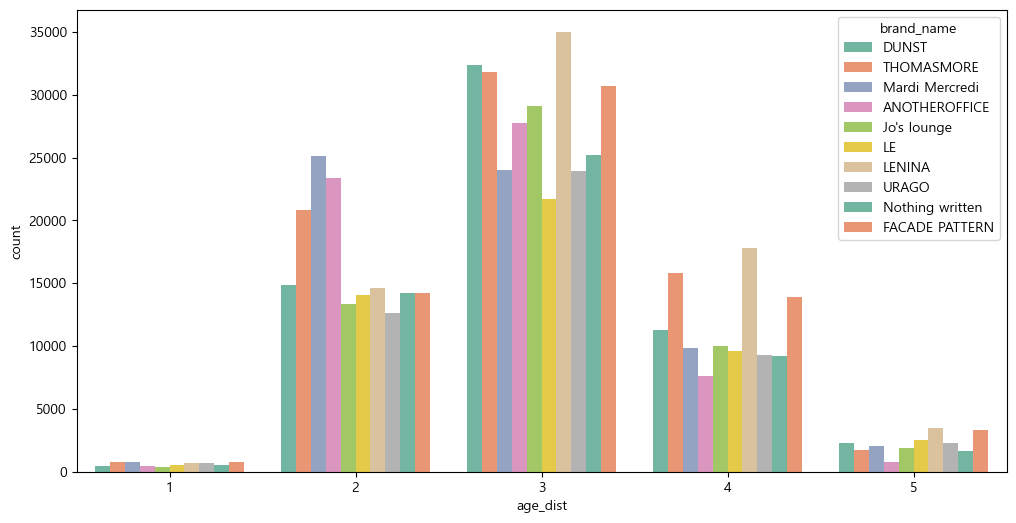

In [46]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df.loc[df['brand_name'].isin(df['brand_name'].value_counts()[:10].index)], x = 'age_dist',
                        hue = 'brand_name', palette = 'Set2')
plt.show()

<AxesSubplot: xlabel='price', ylabel='event_name'>

c:\Users\94dng\Anaconda3\envs\kdt\lib\site-packages\IPython\core\events.py:89: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.

c:\Users\94dng\Anaconda3\envs\kdt\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 8722 (\N{MINUS SIGN}) missing from current font.



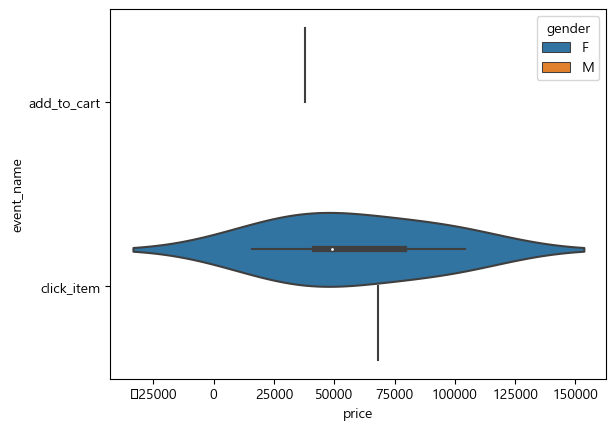

In [47]:
name='서울특별시'
sns.violinplot(y='event_name', x = 'price', hue = 'gender', data = df.loc[df['region']==name][:10])
#ax[idx//4, idx%4].set_title(f'{name}의 구매 금액대') , ax = ax[idx//4, idx%4]

In [48]:
df.loc[df['region']==name][:10]

,event_datatime,event_name,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,...,brand_name,age,gender,birth_date,age_dist,month,date,day_of_Week,is_weekend,response_rating
1,2021-06-03,add_to_cart,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,서울특별시,ANDROID,...,Wave union,34,F,1989-02-22,3,6,3,3,0,5
2,2021-06-03,click_item,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,서울특별시,IOS,...,MONGDOL,39,F,1984-08-22,3,6,3,3,0,1
4,2021-06-03,add_to_cart,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,서울특별시,ANDROID,...,Rockfish Weatherwear,38,NaN,1985-04-04,3,6,3,3,0,5
5,2021-06-03,click_item,mobile,Samsung,SM-G998N,Galaxy S21 Ultra 5G,Android 11,South Korea,서울특별시,ANDROID,...,DUNST,52,F,1971-09-23,5,6,3,3,0,1
8,2021-06-03,click_item,mobile,Apple,iPhone,NaN,iOS 14.4,South Korea,서울특별시,IOS,...,JUAN HOMME,30,M,1993-07-08,3,6,3,3,0,1
11,2021-06-03,click_item,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,서울특별시,ANDROID,...,TATIANA,32,F,1991-02-02,3,6,3,3,0,1
13,2021-06-03,click_item,mobile,Apple,iPhone XS,NaN,iOS 14.4.1,South Korea,서울특별시,IOS,...,WaiKei,39,NaN,1984-10-26,3,6,3,3,0,1
15,2021-06-03,click_item,mobile,Samsung,SM-G935L,Galaxy S7 Edge,Android 8.0.0,South Korea,서울특별시,ANDROID,...,MOIA,53,F,1970-12-02,5,6,3,3,0,1
19,2021-06-03,click_item,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,서울특별시,IOS,...,inA,24,F,1999-06-03,2,6,3,3,0,1
20,2021-06-03,click_item,mobile,Samsung,SM-N981N,Galaxy Note20 5G,Android 11,South Korea,서울특별시,ANDROID,...,yOungly yOungley,26,NaN,1997-02-03,2,6,3,3,0,1


<AxesSubplot: xlabel='price', ylabel='event_name'>

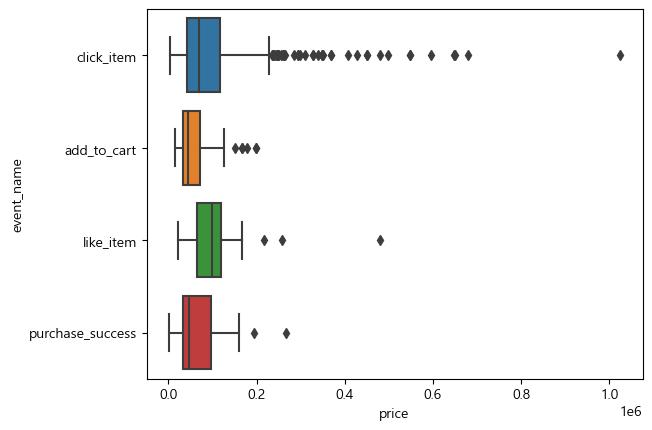

In [49]:
sns.boxplot(data = df.loc[df['region']=='경기도'][:1000], x= 'price', y = 'event_name')

In [50]:
event_df = pd.read_csv('../../29CM_PJT_data/sampled_events.csv')
user_df = pd.read_csv('../../29CM_PJT_data/sampled_users.csv')
product_df = pd.read_csv('../../29CM_PJT_data/sampled_products.csv')

In [51]:
slave_case1 = list(event_df.user_no.value_counts()[(event_df.user_no.value_counts()>=event_df.user_no.value_counts().mean())].index)

In [52]:
slave_case1

['b2xZVfUtjyGsZckO7j6zkg==',
 'tVBuQtnSyPFBKcMaFHIfKA==',
 'DYNvLcoA3LAg4XxUzFizRQ==',
 'b6cqBnzKGYriIJ3rgkGhZg==',
 'XhC4o0a5qal+4B4hzYWrhg==',
 'mBC28GYbcK/YYihocCSM+A==',
 '3ckfAKe/CIcBU+lpPHy6Tw==',
 'gm5NOGRAFCNesXLqGjj+nQ==',
 'b/hA7EACLRmv8OnOpDTKIg==',
 'ojZbd81gV96u2OnmUU9/VA==',
 'mNEefuRO086lDhQBg6j8yA==',
 'k1MJuC4Ur+oxUbeKcrw3rA==',
 'M0tCbcxheMOL2HLFDBvNhA==',
 'R9PSVkLyvE8SI1727+s42w==',
 'BiYaY2eufaD7yffETCBo4g==',
 'ksOe09PDaqcuS3RXn/esIQ==',
 'TYSRg9uaeC/Qc3JTeCpicA==',
 'Bu0ZzuyJ6S1w6K/1hY2VSQ==',
 'S6QcAZpK+vRsatAHS2sssA==',
 '/zPkTctkQ7Mo0Kb+thZDtQ==',
 'cjQvFtptpxD4a0m/rWHf9g==',
 'f7ZcwhB67I5h6OoIat2yig==',
 '7yRnU6cPzmYeFmaImIEGJA==',
 'U/96ZadIg5gyOOruYzAL1A==',
 'GlDX5KDUvGWT5npJbNtvcQ==',
 '1Cl+RNT44ZbSJE0RSlLqLA==',
 'W8gouKEQ3Z8IU4oFWgrEYw==',
 '/hJ/gumKkz89qNtJRwm3sg==',
 'R7dS3B+VR0C1DuClGKPuFQ==',
 '4zz031t5EfKloytcB+L5lA==',
 'Vv5cEvPm7Bqla7DNroeBBg==',
 'qkrGcd8UQ+S2EnybtNHyyg==',
 'gI5oq/uE5sjXGp688l3Qqw==',
 'RBEwdj0CwFhpnYlltWYcoA==',
 'G4whmj1jCNvT

In [53]:
ddd.groupby('user_no').sum().price.mean()

NameError: name 'ddd' is not defined

In [ ]:
dde = ddd.groupby('user_no').sum()[(ddd.groupby('user_no').sum().price>=ddd.groupby('user_no').sum().price.mean())]
slave_case2 = list(dde.index)

In [ ]:
jjin_slave = list(set(slave_case1) & set(slave_case2))

In [ ]:
len(jjin_slave) 'slave1' : slave_case1, 'slave2' : slave_case2, 

24423

In [ ]:
dic = {'user_no' : jjin_slave}
jjin = pd.DataFrame(data = dic)

In [ ]:
jjin_df = pd.merge(jjin, event_df, on='user_no', how='left')

In [ ]:
jjin_event = jjin_df[['user_no', 'event_timestamp', 'event_name', 'item_no',
       'device_type', 'mobile_brand_name', 'country',
       'region']]
jjin_event

,user_no,event_timestamp,event_name,item_no,device_type,mobile_brand_name,country,region
0,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 00:45:15.131034,click_item,LpYG/noVchHgoBnNcZVSIg==,mobile,Apple,South Korea,Seoul
1,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:25:21.016,click_item,FZVq83GdcPJgr3wrEHJhhw==,mobile,Apple,South Korea,Seoul
2,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:25:33.954012,click_item,h+dr/MasdQuHEsGeGEkLNA==,mobile,Apple,South Korea,Seoul
3,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:27:09.349055,click_item,sFHqN8DrrD8kMKDmsaQHSQ==,mobile,Apple,South Korea,Seoul
4,BbMDxDofKWmrkqGJGjZRjA==,2021-06-08 02:27:43.951067,click_item,78y9c+k2Nn/+oaP0NR/UFA==,mobile,Apple,South Korea,Seoul
...,...,...,...,...,...,...,...,...
2531576,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 10:24:43.755015,click_item,1piCtiz5rGBfQFO3Sm1mIw==,mobile,Apple,South Korea,Gangwon-do
2531577,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 11:08:12.004037,click_item,hi15X0cp/d1ViDT1DrTVxQ==,mobile,Apple,South Korea,Gangwon-do
2531578,a+VESOxVicnmoRFK/nDSNg==,2021-07-23 18:31:13.695034,click_item,amWa/aHVwUCm2GsVGhXprw==,mobile,Apple,South Korea,Seoul
2531579,a+VESOxVicnmoRFK/nDSNg==,2021-07-29 18:04:24.330176,click_item,O408esdGDd8UvBwWmq9Qsg==,mobile,Apple,South Korea,Gangwon-do


In [ ]:
jjin_1 = pd.merge(jjin_event, product_df, on='item_no', how='left')
jjin_1.columns

Index(['user_no', 'event_timestamp', 'event_name', 'item_no', 'device_type',
       'mobile_brand_name', 'country', 'region', 'item_name', 'image_name',
       'price', 'category1_code', 'category1_name', 'category2_code',
       'category2_name', 'category3_code', 'category3_name', 'brand_no',
       'brand_name'],
      dtype='object')

In [ ]:
jjin_1 = jjin_1[['user_no', 'event_timestamp', 'event_name', 'item_no', 'device_type',
       'mobile_brand_name', 'country', 'region', 'item_name', 'image_name',
       'price', 'category1_name', 
       'category2_name', 'category3_name', 
       'brand_name']]

In [ ]:
real_jjin = pd.merge(jjin_1, user_df, on='user_no', how='left')

In [ ]:
real_jjin.country.unique()

array(['South Korea', 'Finland', 'United Kingdom', 'United States',
       'Vietnam', 'Taiwan', 'Singapore', 'Japan', 'Guyana', 'Hong Kong',
       'United Arab Emirates', 'China', 'Italy', 'Qatar', 'Indonesia',
       'Canada', 'Australia', 'Russia', 'Malaysia', 'Belgium', 'Sweden',
       'British Virgin Islands', 'France', 'Poland', nan, 'Lebanon',
       'Thailand'], dtype=object)

In [ ]:
real_jjin.to_csv('real_jjin.csv')

In [ ]:
ddd = pd.merge(event_df.loc[event_df['event_name']=='purchase_success'], product_df, on='item_no', how='left')

In [ ]:
df_1 = df_1[['event_timestamp', 'event_name', 'user_no', 'item_no',
       'country', 'region', 'item_name', 'image_name', 'price',
       'category1_name', 'category2_name',
       'category3_name', 'brand_name']]
df_1

,event_timestamp,event_name,user_no,item_no,country,region,item_name,image_name,price,category1_name,category2_name,category3_name,brand_name
0,2021-06-03 13:00:01.845,click_item,+9eODQMZ8YgXQZJJAo56nw==,4KwsZkXDulM0oQ2sTVSlYQ==,South Korea,Gyeonggi-do,남성) 코튼 리넨 이지 쇼츠,ecb06f34b6d8c4c521221aebbcc0e934,29900.0,의류,하의,바지,TOPTEN
1,2021-06-03 13:00:01.920001,add_to_cart,qik2Oa/1SQAjHeR64GLY0g==,+3vED/NUxtVk4Dvc0QUahA==,South Korea,Seoul,Puppy's delight short sleeve T-shirts white,9911a0e7dc8296f2fdccebb3bbbfa615,38000.0,의류,상의,티셔츠,Wave union
2,2021-06-03 13:00:02.35,click_item,FJJ6W70VNARaqflivNavLg==,xuuGT7/l+fld/geUzu6BkA==,South Korea,Seoul,몽돌 니트 MD 소프트 숏 슬리브 크루 넥 반팔 니트 화이트 MDTS002WHITE,43848e15ec2087d51e11f9b1daa41703,42000.0,의류,상의,니트/스웨터,MONGDOL
3,2021-06-03 13:00:02.994,click_item,MsFi+mS5EhwSv+ZqTtZ53w==,FC0aiDVh1JjIXUschc44Pg==,South Korea,Gyeongsangbuk-do,dapper bag (choco brown),218ba78b156a4227bac1e9a952ab24a0,169000.0,잡화,가방,숄더백,yeomim
4,2021-06-03 13:00:03.312001,add_to_cart,frWHEf/czsCEjklEIwxxKA==,yXpbzgtgRe37PEbJlBiKmQ==,South Korea,Seoul,[예약판매][락피쉬웨더웨어] 파스텔 첼시 레인부츠 - 3color,d94b95bf191a86da2ef681ef61fb6bd9,59000.0,잡화,신발,레인부츠/스노우부츠,Rockfish Weatherwear
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880402,2021-08-04 12:59:53.129054,click_item,ROKDMwVDKbb9N82CptJ9dg==,xKvqk3vRvFLpCTQTqpL4ew==,South Korea,Gyeongsangnam-do,Moody Dusk PJ Pants,3ee1c4932c7439eac1af4b6b3b98a322,63000.0,의류,라운지웨어,파자마,Foli
5880403,2021-08-04 12:59:56.151,click_item,0nfvwBd9Qriig0lIgvtiBA==,1qWgJ5SJvbi5+mBYGH848A==,South Korea,Gyeongsangnam-do,[GUAV] Marine Long Sleeve T-shirts,45086e41c64661bafe9859d4b8abfccf,79000.0,의류,상의,티셔츠,GUAV
5880404,2021-08-04 12:59:56.952028,click_item,Z0a8cvN+t0V2WInGzjkM5Q==,M9ucsQ4dNX/t1Bopo599BA==,South Korea,Gyeonggi-do,BALANSA LOGO CAP (AQUA),9874db249a2e55144e4e4f7e3cf10575,59000.0,잡화,모자,볼캡,BALANSA (매입)
5880405,2021-08-04 12:59:58.019142,click_item,vQeO3FiA+W7bmyu2tdKuGg==,W/LoA3I9ym6wowhAdCsUvA==,South Korea,Busan,Fleece jacket (brown),5b4405c3177feb1c4d31c0166bb29191,279000.0,의류,아우터,재킷,ANDNEEDS


In [ ]:
new_df = pd.merge(event_df.loc[event_df['event_name']=='purchase_success'], product_df, how='inner', on='item_no').groupby('user_no').sum()
new_df

,price,category1_code,category2_code,category3_code,brand_no
user_no,,,,,
+++T9c17sr6wEYOy9UFv3w==,274500.0,973400400,973410400,973410410,28139.0
+++aQH5NnhiU/9qECKk3uQ==,163000.0,486200200,486208200,486208206,17472.0
++0bwiYVJ/TAsCpxI4UCuw==,88000.0,243100100,243102100,243102103,7997.0
++1HN9s1imztN8ftPCt3LA==,16800.0,244100100,244107100,244107110,12179.0
++2StXdzG0Bj/Kkb5EFcog==,25900.0,243100100,243104100,243104101,9621.0
...,...,...,...,...,...
zzrBh62TO71nt1GQm+jMjA==,186000.0,488200200,488204200,488204202,12820.0
zzuJMnncH5Wrn/GUA7nqTg==,65000.0,243100100,243103100,243103101,11472.0
zzwYai1YDr0JZQwaTqc0mQ==,52000.0,243100100,243104100,243104101,2050.0


In [ ]:
new_df = new_df[['price']]
new_df = new_df.sort_values(by='price', ascending=False)

In [ ]:
new_df

,price
user_no,
b2xZVfUtjyGsZckO7j6zkg==,29726100.0
anAN3a+fvEnnvFdQ61+Egw==,22966700.0
pywOPeCTmJKudBVHC1/5iw==,11035900.0
b/lqkmii6O9hL/CH0kWgLA==,10094000.0
8j/l4DjsSqXcIR9r5GAmLQ==,10068900.0
...,...
zsIsMbNoIc4xEmZenh3B3w==,600.0
N1KCZiTobZBss1eWO2iSaA==,500.0
b92MPzK5El3jMdyexHEcwA==,500.0


유저 넘버 - 총액 - 국적, 지역 - 나이 성별 - 

In [ ]:
new2_df = pd.merge(new_df, user_df, how='inner', on='user_no')

In [ ]:
new2_df['birth_date'] = new2_df['birth_date'].fillna('1989-01-01')

In [ ]:
new2_df['gender'] = new2_df['gender'].fillna('O')

In [ ]:
new2_df

,user_no,price,birth_date,gender,age
0,b2xZVfUtjyGsZckO7j6zkg==,29726100.0,1978-01-23,F,0
1,anAN3a+fvEnnvFdQ61+Egw==,22966700.0,1981-02-15,F,0
2,pywOPeCTmJKudBVHC1/5iw==,11035900.0,1989-09-19,M,0
3,b/lqkmii6O9hL/CH0kWgLA==,10094000.0,1997-11-19,M,0
4,8j/l4DjsSqXcIR9r5GAmLQ==,10068900.0,1978-12-20,F,0
...,...,...,...,...,...
146899,zsIsMbNoIc4xEmZenh3B3w==,600.0,1989-01-01,O,0
146900,N1KCZiTobZBss1eWO2iSaA==,500.0,1997-04-21,M,0
146901,b92MPzK5El3jMdyexHEcwA==,500.0,1994-03-31,M,0
146902,yHqaSnz/MQRtTX8TRSQ/yA==,0.0,1992-10-28,M,0


In [ ]:
new2_df['birth_date'] = pd.to_datetime(new2_df['birth_date'], format="%Y-%m-%d", errors='coerce')

In [ ]:
new2_df['birth_date'] = new2_df['birth_date'].fillna('1989-01-01')

In [ ]:
new2_df['birth_date'] = pd.to_datetime(new2_df['birth_date'], format="%Y-%m-%d", errors='coerce')

In [ ]:
new2_df['age'] = 2023 - new2_df['birth_date'].dt.year

In [ ]:
product_df.loc[product_df['item_no'].isin(list(event_df.loc[((event_df['user_no']=='b2xZVfUtjyGsZckO7j6zkg==')&(event_df['event_name']=='purchase_success')), 'item_no'])), 'price'].sum()

14333100.0

In [ ]:
list(event_df.loc[((event_df['user_no']=='b2xZVfUtjyGsZckO7j6zkg==')&(event_df['event_name']=='purchase_success')), 'item_no'])

['AI8DsVzK9Ez6Gm3DuVSkvg==',
 'zhg7mrmpCq5TVmrh+bnAiQ==',
 'p3QS41U+GM6tZHNZGTF+sQ==',
 'IrHWWhgQSPdxUwjoPzJgCw==',
 's5hAGaAgVsOub4sUlyBTLw==',
 'jy5XdET1t2FLdbOb423aUA==',
 '7opvm0LTflub9hCgyPD3HQ==',
 'MM1aFHmMcojXX2pxfCg3/w==',
 '9QOWm/r/oxiDRDSHBBySTQ==',
 'rT+1HjrKZljOHZZ+DNqTVA==',
 'O0qdERW047B57kusifrzIw==',
 'u9DSqf4KGnCEmcwwMUgXlg==',
 '5dkGbhi2oCWEos1PaN7w5g==',
 'by6Kag1Zrce1MzCeIQT8hQ==',
 'u9DSqf4KGnCEmcwwMUgXlg==',
 'aQE82vof7eINk0tB66eUVw==',
 '5P7mxn3317L9hCS30wCBCQ==',
 'JqnyoswwejYBgH7eGYsoCA==',
 'aQE82vof7eINk0tB66eUVw==',
 '5dkGbhi2oCWEos1PaN7w5g==',
 's5hAGaAgVsOub4sUlyBTLw==',
 'u9DSqf4KGnCEmcwwMUgXlg==',
 'LDD0cyuBhSLoQ5ndbjr4Xw==',
 '5P7mxn3317L9hCS30wCBCQ==',
 'swLsLYzEQgkvLQpHis7Ryg==',
 'v7zcZhOoZqaN6VEP5OGPtg==',
 'R6F1hojSr5Zn2WOp4g3PnA==',
 'YLVOCkAwAImFgYcCKYJPtQ==',
 'Vxb11EqTtpZYsrlBAIww/Q==',
 'w95IN0f16E0nCmpTkKOb+Q==',
 '/Jvb7YB2oi9xD8p2qWvkFg==',
 'bGb5SaHjtX9Rlwr5dSxUog==',
 '3gDa5iuKj2WGT71IoZxfjQ==',
 'NNE6ZokynEQNooBYfyGHCA==',
 '9LtXhvbZBbu+

In [ ]:
new2_df

,user_no,price,birth_date,gender,age
0,b2xZVfUtjyGsZckO7j6zkg==,29726100.0,1978-01-23,F,45
1,anAN3a+fvEnnvFdQ61+Egw==,22966700.0,1981-02-15,F,42
2,pywOPeCTmJKudBVHC1/5iw==,11035900.0,1989-09-19,M,34
3,b/lqkmii6O9hL/CH0kWgLA==,10094000.0,1997-11-19,M,26
4,8j/l4DjsSqXcIR9r5GAmLQ==,10068900.0,1978-12-20,F,45
...,...,...,...,...,...
146899,zsIsMbNoIc4xEmZenh3B3w==,600.0,1989-01-01,O,34
146900,N1KCZiTobZBss1eWO2iSaA==,500.0,1997-04-21,M,26
146901,b92MPzK5El3jMdyexHEcwA==,500.0,1994-03-31,M,29
146902,yHqaSnz/MQRtTX8TRSQ/yA==,0.0,1992-10-28,M,31


In [ ]:
new2_df

,user_no,price,birth_date,gender,age
0,b2xZVfUtjyGsZckO7j6zkg==,29726100.0,1978-01-23,F,45
1,anAN3a+fvEnnvFdQ61+Egw==,22966700.0,1981-02-15,F,42
2,pywOPeCTmJKudBVHC1/5iw==,11035900.0,1989-09-19,M,34
3,b/lqkmii6O9hL/CH0kWgLA==,10094000.0,1997-11-19,M,26
4,8j/l4DjsSqXcIR9r5GAmLQ==,10068900.0,1978-12-20,F,45
...,...,...,...,...,...
146899,zsIsMbNoIc4xEmZenh3B3w==,600.0,1989-01-01,O,34
146900,N1KCZiTobZBss1eWO2iSaA==,500.0,1997-04-21,M,26
146901,b92MPzK5El3jMdyexHEcwA==,500.0,1994-03-31,M,29
146902,yHqaSnz/MQRtTX8TRSQ/yA==,0.0,1992-10-28,M,31


In [ ]:
pd.merge(new2_df, co_re, how='inner', on='user_no')

,user_no,price,birth_date,gender,age,country,region
0,b2xZVfUtjyGsZckO7j6zkg==,29726100.0,1978-01-23,F,45,South Korea,Chungcheongnam-do
1,b2xZVfUtjyGsZckO7j6zkg==,29726100.0,1978-01-23,F,45,South Korea,Chungcheongnam-do
2,b2xZVfUtjyGsZckO7j6zkg==,29726100.0,1978-01-23,F,45,South Korea,Chungcheongnam-do
3,b2xZVfUtjyGsZckO7j6zkg==,29726100.0,1978-01-23,F,45,South Korea,Chungcheongnam-do
4,b2xZVfUtjyGsZckO7j6zkg==,29726100.0,1978-01-23,F,45,South Korea,Chungcheongnam-do
...,...,...,...,...,...,...,...
4365472,6ir2ttlfekzXxidzH6Gu3A==,0.0,1991-12-05,F,32,South Korea,Gyeongsangbuk-do
4365473,6ir2ttlfekzXxidzH6Gu3A==,0.0,1991-12-05,F,32,South Korea,Gyeongsangbuk-do
4365474,6ir2ttlfekzXxidzH6Gu3A==,0.0,1991-12-05,F,32,South Korea,Gyeongsangbuk-do
4365475,6ir2ttlfekzXxidzH6Gu3A==,0.0,1991-12-05,F,32,South Korea,Gyeongsangbuk-do


In [56]:
df

,event_datatime,event_name,device_type,mobile_brand_name,mobile_model_name,mobile_marketing_name,operating_system_version,country,region,platform,...,brand_name,age,gender,birth_date,age_dist,month,date,day_of_Week,is_weekend,response_rating
0,2021-06-03,click_item,mobile,Samsung,SM-N960N,Galaxy Note9,Android 10,South Korea,경기도,ANDROID,...,TOPTEN,54,F,1969-04-05,5,6,3,3,0,1
1,2021-06-03,add_to_cart,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,서울특별시,ANDROID,...,Wave union,34,F,1989-02-22,3,6,3,3,0,5
2,2021-06-03,click_item,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,서울특별시,IOS,...,MONGDOL,39,F,1984-08-22,3,6,3,3,0,1
3,2021-06-03,click_item,mobile,Apple,iPhone,NaN,iOS 14.4.2,South Korea,경상북도,IOS,...,yeomim,51,F,1972-09-07,5,6,3,3,0,1
4,2021-06-03,add_to_cart,mobile,Samsung,SM-G970N,Galaxy S10e,Android 11,South Korea,서울특별시,ANDROID,...,Rockfish Weatherwear,38,NaN,1985-04-04,3,6,3,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5880402,2021-08-04,click_item,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,경상남도,IOS,...,Foli,24,F,1999-07-12,2,8,4,2,0,1
5880403,2021-08-04,click_item,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,경상남도,IOS,...,GUAV,25,F,1998-04-04,2,8,4,2,0,1
5880404,2021-08-04,click_item,mobile,Apple,iPhone,NaN,iOS 14.6,South Korea,경기도,IOS,...,BALANSA (매입),32,F,1991-12-03,3,8,4,2,0,1
5880405,2021-08-04,click_item,mobile,Samsung,SM-G977N,Galaxy S10 5G,Android 11,South Korea,부산광역시,ANDROID,...,ANDNEEDS,45,F,1978-12-21,4,8,4,2,0,1


## 카테고리2와 금액에 따른 구매까지 이루어지는 기간의 변화

In [ ]:
plt.figure(figsize = (8, 6))
sns.scatterplot(data=purchase_df)
plt.show()